# Brute-Force Matching

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
def display(img):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

In [6]:
img_r = cv2.imread('DATA/reeses_puffs.png', 0)

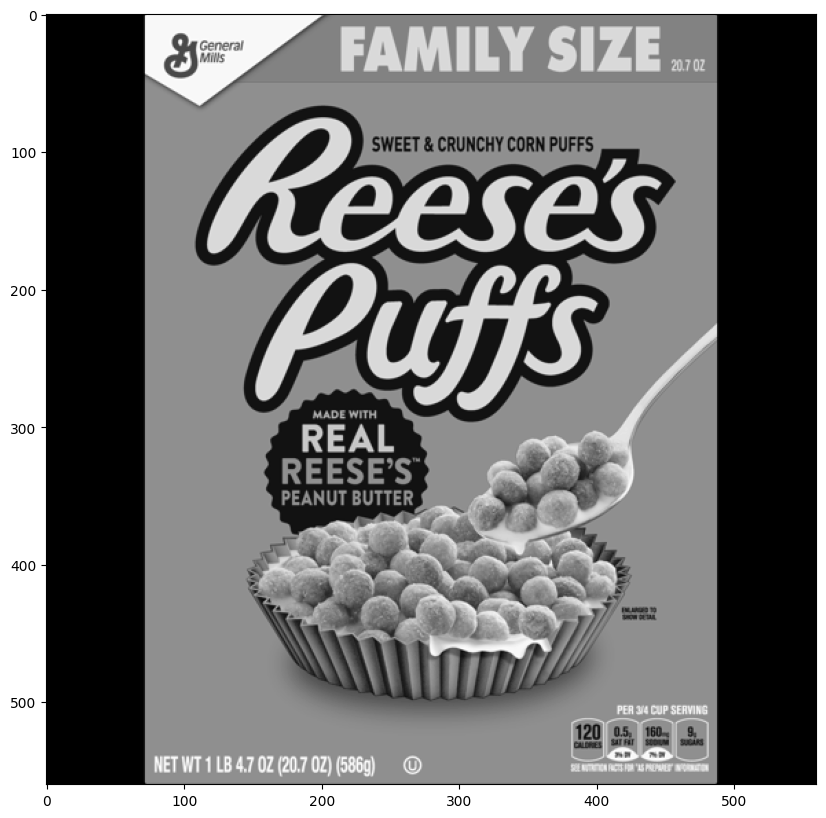

In [7]:
display(img_r)

In [8]:
img_c = cv2.imread('DATA/many_cereals.jpg', 0)

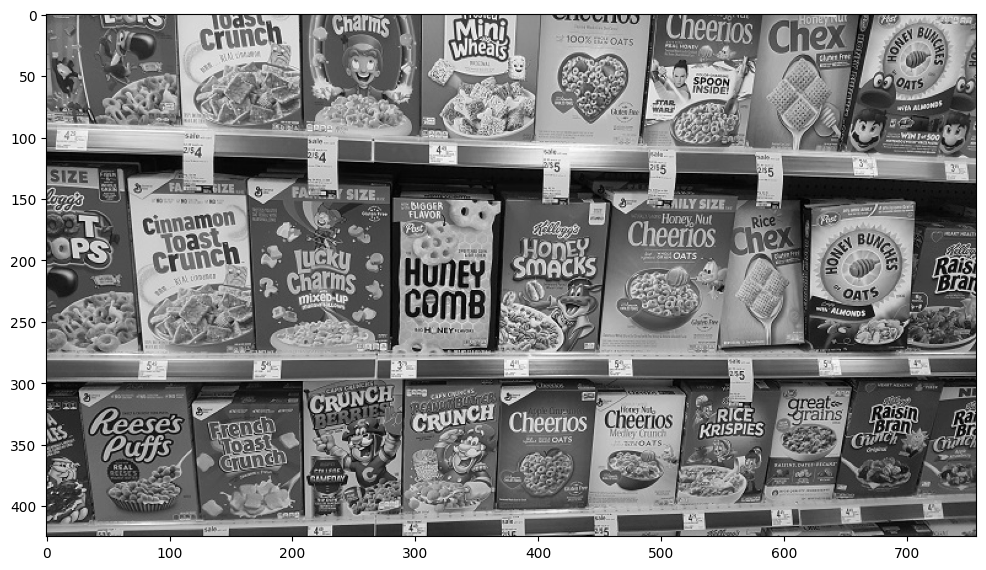

In [9]:
display(img_c)

In [10]:
orb = cv2.ORB_create()

In [11]:
kp1,des1 = orb.detectAndCompute(img_r, None)

In [12]:
kp2,des2 = orb.detectAndCompute(img_c, None)

In [13]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

In [14]:
bf

< cv2.BFMatcher 00000227B125C310>

In [15]:
matches = bf.match(des1, des2)

In [16]:
matches = sorted(matches, key = lambda x:x.distance)

In [17]:
matches

[< cv2.DMatch 00000227B125C7F0>,
 < cv2.DMatch 00000227B125C710>,
 < cv2.DMatch 00000227B125C630>,
 < cv2.DMatch 00000227B125C8B0>,
 < cv2.DMatch 00000227B125CD10>,
 < cv2.DMatch 00000227B125CEF0>,
 < cv2.DMatch 00000227B125CCB0>,
 < cv2.DMatch 00000227B125C9B0>,
 < cv2.DMatch 00000227B125C9D0>,
 < cv2.DMatch 00000227B125C750>,
 < cv2.DMatch 00000227B125CC30>,
 < cv2.DMatch 00000227B125CD70>,
 < cv2.DMatch 00000227B11B2AB0>,
 < cv2.DMatch 00000227B125C650>,
 < cv2.DMatch 00000227B125C670>,
 < cv2.DMatch 00000227B125C790>,
 < cv2.DMatch 00000227B125CAB0>,
 < cv2.DMatch 00000227B11B1410>,
 < cv2.DMatch 00000227B125C410>,
 < cv2.DMatch 00000227B125CA10>,
 < cv2.DMatch 00000227B11B2A90>,
 < cv2.DMatch 00000227B125CC90>,
 < cv2.DMatch 00000227B125CCF0>,
 < cv2.DMatch 00000227B125CE90>,
 < cv2.DMatch 00000227B125D010>,
 < cv2.DMatch 00000227B125C450>,
 < cv2.DMatch 00000227B125C890>,
 < cv2.DMatch 00000227B125C8D0>,
 < cv2.DMatch 00000227B125CA70>,
 < cv2.DMatch 00000227B125C130>,
 < cv2.DMa

In [18]:
reeses_matches = cv2.drawMatches(img_r, kp1, img_c, kp2, matches, None, flags = 2)

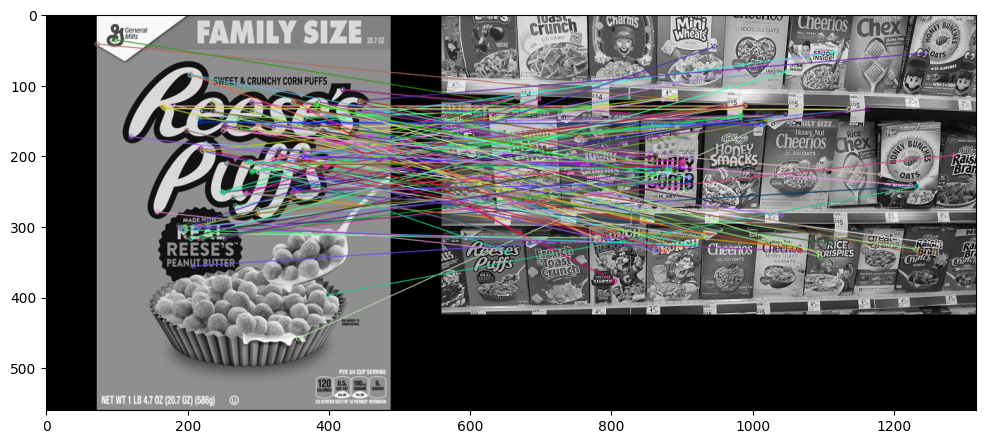

In [19]:
display(reeses_matches)

# SIFT Matching

In [29]:
sift = cv2.SIFT_create()

In [30]:
kp1,des1 = sift.detectAndCompute(img_r, None)
kp2,des2 = sift.detectAndCompute(img_c, None)

In [26]:
cf  = cv2.BFMatcher()

In [31]:
matches = cf.knnMatch(des1, des2,k=2)

In [ ]:
matches

In [33]:
good = []

for m1, m2 in matches:
    if m1.distance < 0.75 * m2.distance:
        good.append([m1])

In [ ]:
good

In [35]:
len(good)

79

In [36]:
len(matches)

1501

In [39]:
sift_matches = cv2.drawMatchesKnn(img_r, kp1, img_c, kp2, good, None, flags = 2)

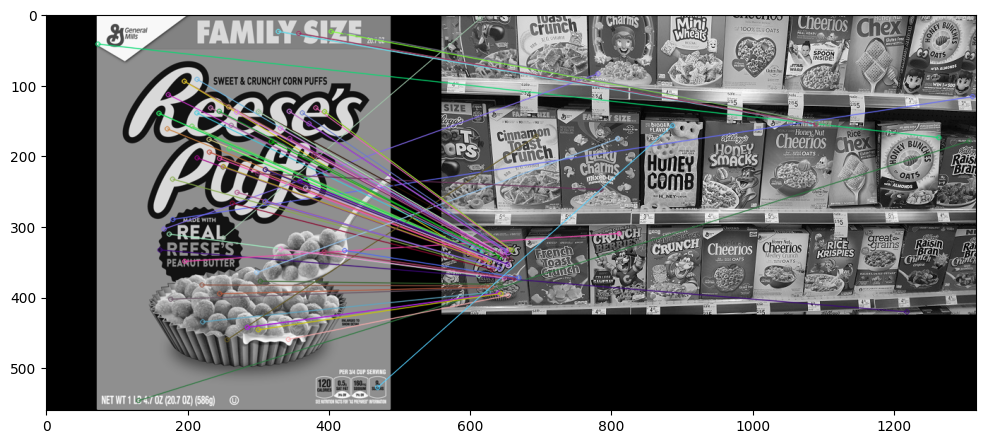

In [40]:
display(sift_matches)

# FLANN

In [178]:
d2 = cv2.imread('dogs_1280p_0.jpg',0)
d1 = cv2.imread('images.jpg',0)


In [179]:
sift = cv2.SIFT_create()

In [180]:
kp1,des1 = sift.detectAndCompute(d1, None)
kp2, des2 = sift.detectAndCompute(d2, None)

In [181]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

In [182]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [183]:
matches = flann.knnMatch(des1, des2, k= 2)

In [184]:
mask =[ [0, 0] for i in range(len(matches))]

In [ ]:
mask

In [186]:

for i, (m1, m2) in enumerate(matches):
    if m1.distance < 0.70*m2.distance:
        mask[i] = [1, 0]
        

In [187]:
draw_para = dict(matchColor = (0, 255, 0),
                 singlePointColor = (255, 0, 0),
                 matchesMask = mask,
                flags = 2)

In [188]:
flann_match = cv2.drawMatchesKnn(d1, kp1, d2, kp2, matches,None, **draw_para)

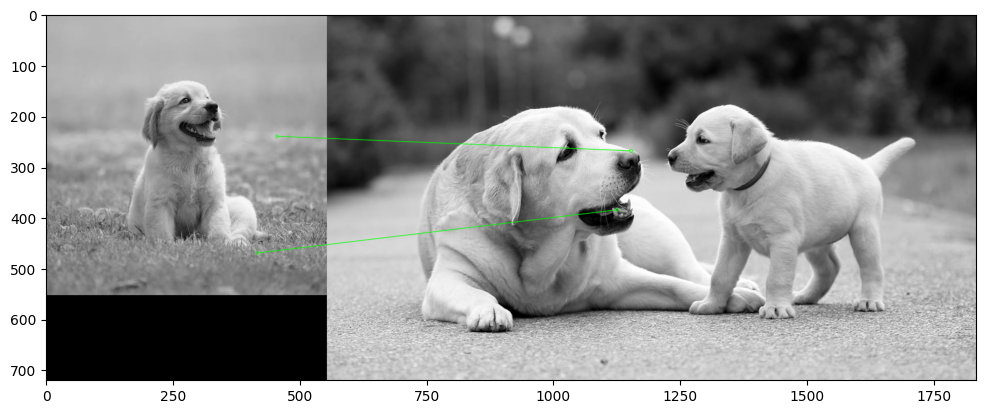

In [189]:
display(flann_match)